In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
max_features = 10000                                  
maxlen = 500                                          
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.6351 - acc: 0.6254 - val_loss: 0.5240 - val_acc: 0.7566
Epoch 2/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.3972 - acc: 0.8310 - val_loss: 0.3933 - val_acc: 0.8274
Epoch 3/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.2998 - acc: 0.8813 - val_loss: 0.3799 - val_acc: 0.8270
Epoch 4/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.2147 - acc: 0.9181 - val_loss: 0.4151 - val_acc: 0.8082
Epoch 5/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.1565 - acc: 0.9426 - val_loss: 0.3834 - val_acc: 0.8658
Epoch 6/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.1082 - acc: 0.9624 - val_loss: 0.6166 - val_acc: 0.7898
Epoch 7/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.0769 - acc: 0.9743 - val_loss: 0.5633 - val_acc:

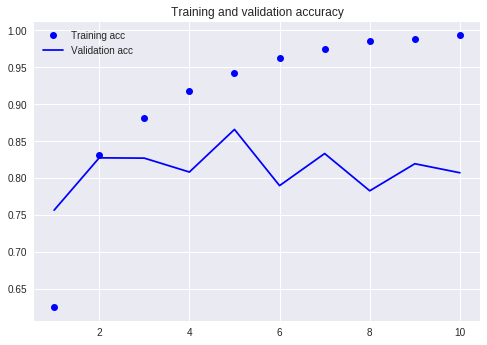

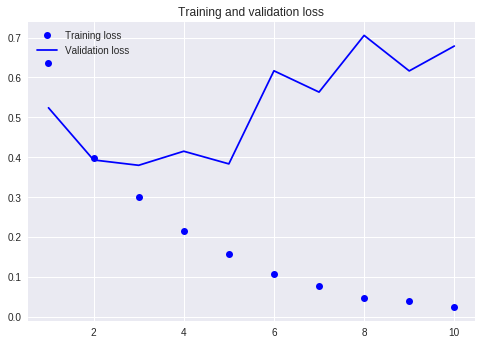

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.5049 - acc: 0.7640 - val_loss: 0.3559 - val_acc: 0.8592
Epoch 2/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.2889 - acc: 0.8863 - val_loss: 0.3598 - val_acc: 0.8418
Epoch 3/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.2301 - acc: 0.9116 - val_loss: 0.3382 - val_acc: 0.8778
Epoch 4/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.1966 - acc: 0.9271 - val_loss: 0.5046 - val_acc: 0.8396
Epoch 5/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.1743 - acc: 0.9375 - val_loss: 0.2873 - val_acc: 0.8842
Epoch 6/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.1524 - acc: 0.9448 - val_loss: 0.4846 - val_acc: 0.8170
Epoch 7/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.1434 - acc: 0.9488 - val_loss: 0.3567 - val_acc:

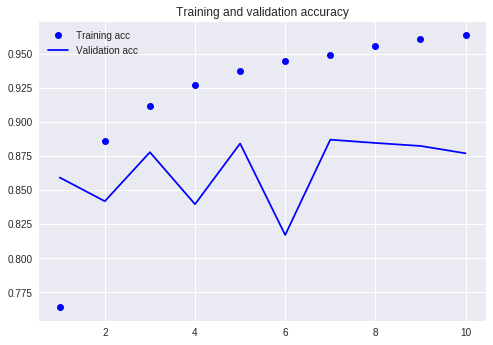

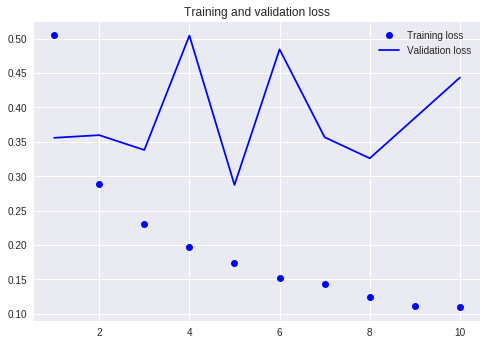

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()